<a href="https://colab.research.google.com/github/Aditri-07/Option-Pricing-Model/blob/main/Black_Scholes_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE BLACK SCHOLES MERTON MODEL

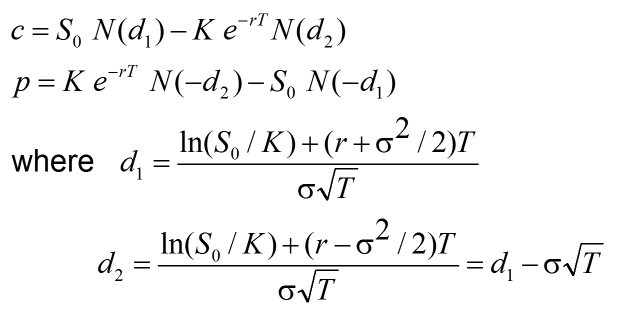

*This project aims to analyze options data for Goldman Sachs (GS) using the Black-Scholes model. It involves loading the data, performing preprocessing, visualizing implied volatility, and calculating option prices and implied volatility.*

In [ ]:
from math import sqrt
import numpy as np
from scipy.stats import norm

In [ ]:
import pandas as pd
options_df = pd.read_csv("option_GS_df.csv", parse_dates=["Expiration", ' DataDate'])
options_df

,Unnamed: 0,UnderlyingPrice,OptionSymbol,Type,Expiration,DataDate,Strike,Last,Bid,Ask,...,OpenInterest,T1OpenInterest,IVMean,IVBid,IVAsk,Delta,Gamma,Theta,Vega,AKA
0,0,174.09,GS160108C00125000,call,2016-01-08,2016-01-05,125.0,0.0,46.95,50.80,...,0,0,0.0874,0.0000,3.1911,1.0000,0.0000,0.0000,0.0000,GS160108C00125000
1,1,174.09,GS160108P00125000,put,2016-01-08,2016-01-05,125.0,0.0,0.00,0.31,...,0,0,1.9822,0.0000,2.2141,-0.0150,0.0014,-0.2242,0.0053,GS160108P00125000
2,2,174.09,GS160108C00130000,call,2016-01-08,2016-01-05,130.0,0.0,41.80,45.80,...,0,0,0.0874,0.0000,2.8946,1.0000,0.0000,0.0000,0.0000,GS160108C00130000
3,3,174.09,GS160108P00130000,put,2016-01-08,2016-01-05,130.0,0.0,0.00,0.31,...,0,0,1.7931,0.0000,1.9882,-0.0175,0.0017,-0.2310,0.0060,GS160108P00130000
4,4,174.09,GS160108C00135000,call,2016-01-08,2016-01-05,135.0,0.0,36.95,40.90,...,0,0,0.0874,0.0000,2.6480,1.0000,0.0000,0.0000,0.0000,GS160108C00135000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,853,174.09,GS180119P00270000,put,2018-01-19,2016-01-05,270.0,84.6,94.50,99.45,...,6,6,0.1835,0.0000,0.2409,-0.9387,0.0027,-0.0037,0.3013,GS180119P00270000
854,854,174.09,GS180119C00280000,call,2018-01-19,2016-01-05,280.0,0.0,1.19,2.55,...,0,0,0.2162,0.1981,0.2342,0.0830,0.0028,-0.0055,0.3800,GS180119C00280000
855,855,174.09,GS180119P00280000,put,2018-01-19,2016-01-05,280.0,0.0,104.00,108.90,...,0,0,0.1800,0.0000,0.2434,-0.9573,0.0020,-0.0027,0.2259,GS180119P00280000
856,856,174.09,GS180119C00290000,call,2018-01-19,2016-01-05,290.0,0.0,0.76,1.90,...,0,0,0.2117,0.1930,0.2304,0.0622,0.0023,-0.0043,0.3045,GS180119C00290000


In [ ]:
# Calculate the difference in days between Expiration and DataDate
options_df['date_diff'] = (options_df['Expiration'] - options_df[' DataDate']).dt.days

# Calculate the spread between Ask and Bid prices
options_df['Spread'] = options_df['Ask'] - options_df['Bid']

# Display the first 10 rows of the DataFrame
options_df.head(10)

,Unnamed: 0,UnderlyingPrice,OptionSymbol,Type,Expiration,DataDate,Strike,Last,Bid,Ask,...,IVMean,IVBid,IVAsk,Delta,Gamma,Theta,Vega,AKA,date_diff,Spread
0,0,174.09,GS160108C00125000,call,2016-01-08,2016-01-05,125.0,0.0,46.95,50.80,...,0.0874,0.0,3.1911,1.0000,0.0000,0.0000,0.0000,GS160108C00125000,3,3.85
1,1,174.09,GS160108P00125000,put,2016-01-08,2016-01-05,125.0,0.0,0.00,0.31,...,1.9822,0.0,2.2141,-0.0150,0.0014,-0.2242,0.0053,GS160108P00125000,3,0.31
2,2,174.09,GS160108C00130000,call,2016-01-08,2016-01-05,130.0,0.0,41.80,45.80,...,0.0874,0.0,2.8946,1.0000,0.0000,0.0000,0.0000,GS160108C00130000,3,4.00
3,3,174.09,GS160108P00130000,put,2016-01-08,2016-01-05,130.0,0.0,0.00,0.31,...,1.7931,0.0,1.9882,-0.0175,0.0017,-0.2310,0.0060,GS160108P00130000,3,0.31
4,4,174.09,GS160108C00135000,call,2016-01-08,2016-01-05,135.0,0.0,36.95,40.90,...,0.0874,0.0,2.6480,1.0000,0.0000,0.0000,0.0000,GS160108C00135000,3,3.95
5,5,174.09,GS160108P00135000,put,2016-01-08,2016-01-05,135.0,0.0,0.00,0.33,...,1.5624,0.0,1.7887,-0.0179,0.0020,-0.2058,0.0061,GS160108P00135000,3,0.33
6,6,174.09,GS160108C00140000,call,2016-01-08,2016-01-05,140.0,0.0,31.75,35.80,...,0.0874,0.0,2.3219,1.0000,0.0000,0.0000,0.0000,GS160108C00140000,3,4.05
7,7,174.09,GS160108P00140000,put,2016-01-08,2016-01-05,140.0,0.0,0.00,0.22,...,1.3428,0.0,1.4610,-0.0186,0.0024,-0.1823,0.0063,GS160108P00140000,3,0.22
8,8,174.09,GS160108C00145000,call,2016-01-08,2016-01-05,145.0,0.0,26.75,30.95,...,0.0874,0.0,2.0976,1.0000,0.0000,0.0000,0.0000,GS160108C00145000,3,4.20
9,9,174.09,GS160108P00145000,put,2016-01-08,2016-01-05,145.0,0.0,0.00,0.23,...,1.1126,0.0,1.2704,-0.0179,0.0028,-0.1460,0.0061,GS160108P00145000,3,0.23


# **Plotting the Volatility Smile**

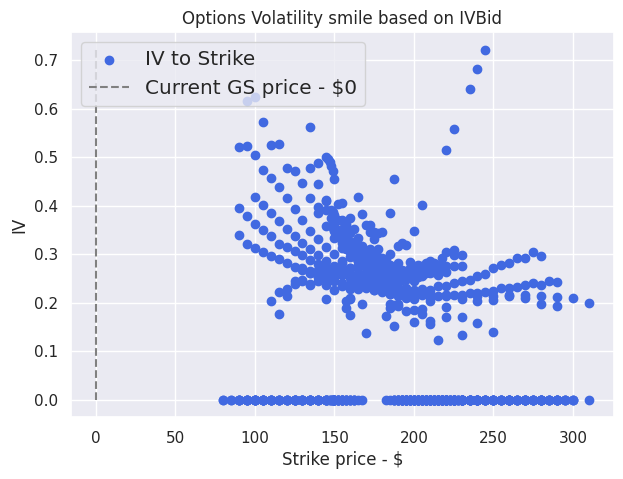

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Plot the volatility smile: a scatter plot of implied volatility (IV) versus strike price using the Bid prices.
current_price_ = options_df.iloc[0,0]
plt.figure(figsize=(7, 5))
plt.scatter(options_df.Strike, options_df.IVBid, label='IV to Strike', c='royalblue')
plt.vlines(current_price_, options_df.IVBid.min(), options_df.IVBid.max(),
           label='Current GS price - ${}'.format(current_price_), linestyles='--', colors='gray')
plt.xlabel('Strike price - $')
plt.ylabel('IV')
plt.title('Options Volatility smile based on IVBid')
plt.legend(fontsize='large')
plt.show()

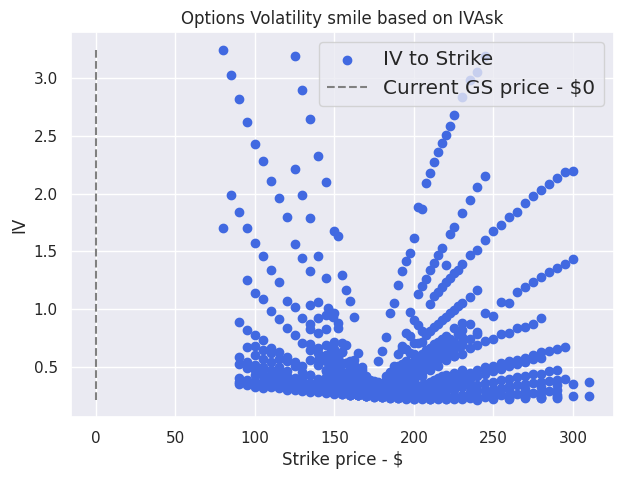

In [ ]:
# Plot the volatility smile based on IVAsk:  a scatter plot of implied volatility (IV) versus strike price using the Ask prices.
current_price_ = options_df.iloc[0,0]
plt.figure(figsize=(7,5))
plt.scatter(options_df.Strike, options_df.IVAsk, label='IV to Strike', c='royalblue')
plt.vlines(current_price_, options_df.IVAsk.min(), options_df.IVAsk.max(),
           label='Current GS price - ${}'.format(current_price_), linestyles='--', colors='gray')
plt.xlabel('Strike price - $')
plt.ylabel('IV')
plt.title('Options Volatility smile based on IVAsk')
plt.legend(fontsize='large')
plt.show()

# **Filtering Calls and Puts**

In [ ]:
# Filter the DataFrame for call options
options_df_call = options_df[options_df['Type'] == 'call'].reset_index(drop=True)

# Filter the DataFrame for put options
options_df_put = options_df[options_df['Type'] != 'call'].reset_index(drop=True)

# Display the first 10 rows of call options
print(options_df_call.head(10))

# Display the first 10 rows of put options
print(options_df_put.head(10))

   Unnamed: 0  UnderlyingPrice       OptionSymbol  Type Expiration   DataDate  \
0           0           174.09  GS160108C00125000  call 2016-01-08 2016-01-05   
1           2           174.09  GS160108C00130000  call 2016-01-08 2016-01-05   
2           4           174.09  GS160108C00135000  call 2016-01-08 2016-01-05   
3           6           174.09  GS160108C00140000  call 2016-01-08 2016-01-05   
4           8           174.09  GS160108C00145000  call 2016-01-08 2016-01-05   
5          10           174.09  GS160108C00150000  call 2016-01-08 2016-01-05   
6          12           174.09  GS160108C00152500  call 2016-01-08 2016-01-05   
7          14           174.09  GS160108C00155000  call 2016-01-08 2016-01-05   
8          16           174.09  GS160108C00157500  call 2016-01-08 2016-01-05   
9          18           174.09  GS160108C00160000  call 2016-01-08 2016-01-05   

   Strike   Last    Bid    Ask  ...  IVMean  IVBid   IVAsk  Delta  Gamma  \
0   125.0   0.00  46.95  50.80  

# **Plot the volatility smile for call options**

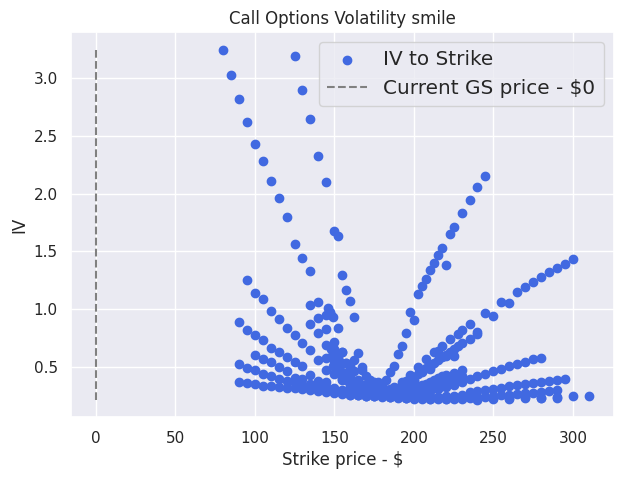

In [ ]:
current_price_ = options_df_call.iloc[0,0]
plt.figure(figsize=(7,5))
plt.scatter(options_df_call.Strike, options_df_call.IVAsk, label='IV to Strike', c='royalblue')
plt.vlines(current_price_, options_df_call.IVAsk.min(), options_df_call.IVAsk.max(),
           label='Current GS price - ${}'.format(current_price_), linestyles='--', colors='gray')
plt.xlabel('Strike price - $')
plt.ylabel('IV')
plt.title('Call Options Volatility smile')
plt.legend(fontsize='large')
plt.show()

# **Plot the volatility smile for put options**

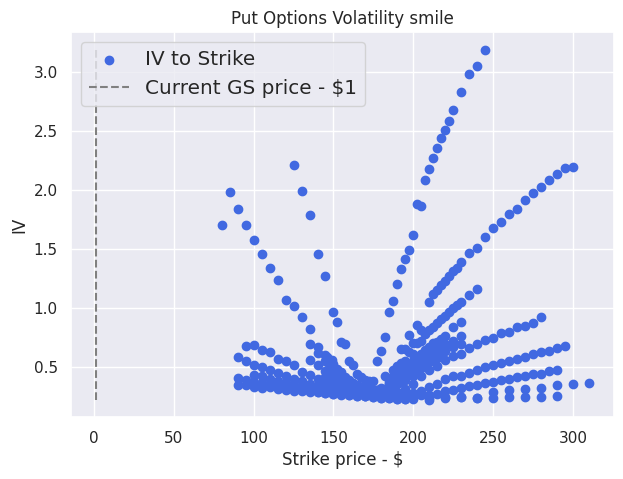

In [ ]:
current_price_ = options_df_put.iloc[0,0]
plt.figure(figsize=(7,5))
plt.scatter(options_df_put.Strike, options_df_put.IVAsk, label='IV to Strike', c='royalblue')
plt.vlines(current_price_, options_df_put.IVAsk.min(), options_df_put.IVAsk.max(),
           label='Current GS price - ${}'.format(current_price_), linestyles='--', colors='gray')
plt.xlabel('Strike price - $')
plt.ylabel('IV')
plt.title('Put Options Volatility smile')
plt.legend(fontsize='large')
plt.show()

#**Black-Scholes Model Implementation**

1. S is the spot price
2. K is the strike price
3. T is the fraction of days to strike date divided by 252 (stock market days)
4. r is the risk free rate
5. sigma is the annual volatility of the returns of the stock

In [ ]:
# Define the Black-Scholes model for European call options
def black_scholes(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    #put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return call_price

In [ ]:
# Test the function with example values
print("Call price is", black_scholes(50, 100, 1, 0.1, 0.2))

Call price is 0.0057743492760725795


In [ ]:
# Calculate the European call option prices for the options data
df = options_df_call
test_S = df['UnderlyingPrice'][1]
test_K = df['Strike'][1]
test_T = df['date_diff'][1] / 252
test_r = 0.0056
test_sigma = df['IVMean'][1]

test = black_scholes(test_S, test_K, test_T, test_r,test_sigma)
print(f"Example Call Price: {test}")

Example Call Price: 44.09866637778421


**Applying Black Scholes Model to the Dataset**

In [ ]:
# Function to calculate modeled prices for all call options in the DataFrame
# bid- market prices
# m_price- model prices
def modelled_prices(data, r=0.0056):
    data['m_prices'] = 0
    for i in range(len(data)):
        S = data.loc[i, 'UnderlyingPrice']
        K = data.loc[i, 'Strike']
        T = data.loc[i, 'date_diff'] / 252  # Convert days to fraction of the year
        sigma = data.loc[i, 'IVMean']
        data.at[i, 'm_prices'] = black_scholes(S, K, T, r, sigma)
    return data

In [ ]:
# Apply the function to the call options DataFrame
final = modelled_prices(options_df_call)
print(final[['Bid', 'm_prices']].head(10))

     Bid   m_prices
0  46.95  49.098333
1  41.80  44.098666
2  36.95  39.099000
3  31.75  34.099333
4  26.75  29.099666
5  21.90  24.100000
6  19.35  21.600166
7  17.15  19.100333
8  14.80  16.600500
9  12.70  14.100666


**Calculate Implied Volatility**

In [ ]:
# Function to calculate the implied volatility for European call options
def calc_impl_vol(price, underlying, strike, time, rf=0.01, inc=0.001):
    def objective(sigma):
        return black_scholes(underlying, strike, time, rf, sigma) - price

    implied_vol = optimize.brentq(objective, 0.01, 5.0)
    return implied_vol

In [ ]:
# Calculate implied volatility for an example option
iv = calc_impl_vol(price=25., underlying=100., strike=80., time=1., rf=0.01)
print("Implied Volatility: ", iv)

Implied Volatility:  0.3331305899422482
